# Plot convolution

In [1]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:35553")
client

<Client: 'tcp://127.0.0.1:35553' processes=4 threads=8, memory=61.46 GiB>

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from os.path import join,expanduser
import sys

# import emu plotting tools
sys.path.append('/efs_ecco/ECCO/EMU/emu_userinterface_dir/')
import emu_plot_arg_py as ept

import lib_python
import plot_conv
import plot_conv_sub

# identify user's home directory
user_home_dir = expanduser('~')

# import the ECCOv4 py library 
sys.path.insert(0,join(user_home_dir,'ECCOv4-py'))
import ecco_v4_py as ecco

## Paths to EMU outputs:

Sampling (relative to global mean):
`/efs_ecco/mzahn/emu_samp/emu_samp_m_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0-gmn_1` <br>

Sampling (not relative to global mean):
`/efs_ecco/mzahn/emu_samp_v2/emu_samp_m_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1` <br>

Adjoint:
`/efs_ecco/mzahn/emu_mackenzie/emu_adj_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1` <br>

Convolution:
`/efs_ecco/mzahn/emu_conv/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_1196` <br>

**The code below opens EMU output as a dictionary and then generates plots that are similar to the menu-driven outputs**

### Sampling

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs_ecco/ECCO/EMU2/emu_input_dir



Enter directory of EMU run to examine; e.g., emu_samp_m_2_45_585_1 ... ?  /efs_ecco/mzahn/emu_samp_v2/emu_samp_m_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1



Reading /efs_ecco/mzahn/emu_samp_v2/emu_samp_m_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1

Reading Sampling Tool output ... 

*********************************************
Read variables
   smp: temporal anomaly of sampled variable
   smp_mn: reference time-mean of sampled variable
from file /efs_ecco/mzahn/emu_samp_v2/emu_samp_m_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1/output/samp.out_312

*********************************************
Read variable
   smp_hr: sample time (hours from 1/1/1992 12Z)
from file /efs_ecco/mzahn/emu_samp_v2/emu_samp_m_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1/output/samp.step_312

Plotting sampled time-series ... 


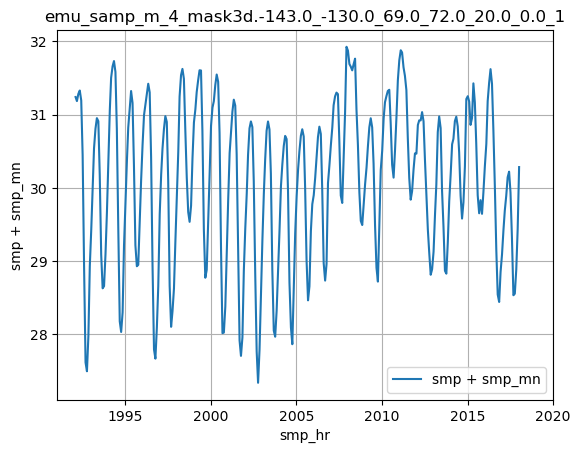


***********************
EMU variables read as global variables in module global_emu_var (emu); e.g., emu.nx
***********************
cs                  drc                 drf                 dvol3d              
dxc                 dxg                 dyc                 dyg                 
hfacc               hfacs               hfacw               nr                  
nx                  ny                  rac                 ras                 
raw                 raz                 rc                  rf                  
smp                 smp_hr              smp_mn              sn                  
xc                  xg                  yc                  yg                  


In [4]:
import runpy
runpy.run_path('/efs_ecco/ECCO/EMU/emu_userinterface_dir/python/emu_plot.py');
# The following that uses a module go through the same menu-driven process s using runpy above, but 
# globals_dict is a dictionary, containing 'return_vars' and 'emu'.
# return_vars' contains the data used to make the plot.
# emu contains more variables that were used in ept.
# globals_dict = ept.emu_plot()

In [5]:
globals_dict_samp = ept.emu_plot(run_name="/efs_ecco/mzahn/emu_samp_v2/emu_samp_m_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1")

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs_ecco/ECCO/EMU2/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/mzahn/emu_samp_v2/emu_samp_m_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1

Reading /efs_ecco/mzahn/emu_samp_v2/emu_samp_m_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1

Reading Sampling Tool output ... 

*********************************************
Read variables
   smp: temporal anomaly of sampled variable
   smp_mn: reference time-mean of sampled variable
from file /efs_ecco/mzahn/emu_samp_v2/emu_samp_m_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1/output/samp.out_312

*********************************************
Read variable
   smp_hr: sample time (hours from 1/1/1992 12Z)
from file /efs_ecco/mzahn/emu_samp_v2/emu_samp_m_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1/output/samp.step_312

Plotting sampled time-series ... 

***********************
EMU variables read as global variables in module global_e

In [6]:
globals_dict_samp['return_vars'].keys()

dict_keys(['time_values', 'variable', 'samp_path'])

In [7]:
sss_box = globals_dict_samp['return_vars']['variable']
samp_time_box = globals_dict_samp['return_vars']['time_values']

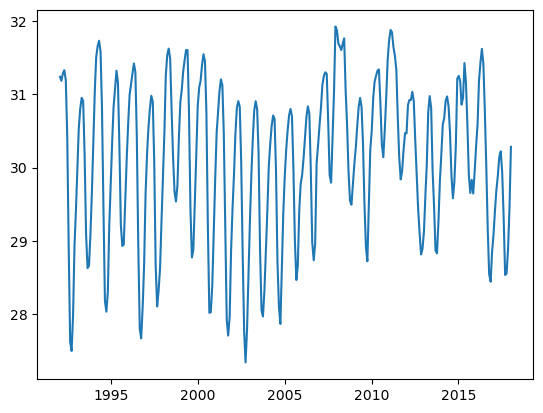

In [8]:
plt.plot(globals_dict_samp['return_vars']['time_values'],sss_box);

In [9]:
delta_sss_box = sss_box - sss_box.mean()

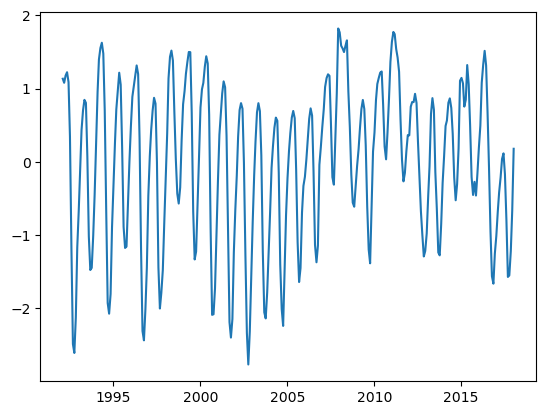

In [10]:
plt.plot(globals_dict_samp['return_vars']['time_values'],delta_sss_box);

### Adjoint

In [31]:
globals_dict_adj = ept.emu_plot(run_name="/efs_ecco/mzahn/emu_mackenzie/emu_adj_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1/",
                            ctrl_num_list=[1, 2, 3, 4, 5, 6, 7, 8],
                            lag_beg=0, lag_end=1000000);

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs_ecco/ECCO/EMU2/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/mzahn/emu_mackenzie/emu_adj_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1/

Reading /efs_ecco/mzahn/emu_mackenzie/emu_adj_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1

Reading Adjoint Tool output ... 

Found file: adxx_empmr.0000000129.data

*********************************************
Read adjoint gradient for empmr
   adxx: adjoint gradient as a function of space and lag
from file /efs_ecco/mzahn/emu_mackenzie/emu_adj_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1/output/adxx_empmr.0000000129.data
 
Zero lag at (week/record) = 1197
Max  lag at (week/record) = 1148
Specified start and end files #: 0 and 1000000

*********************************************
Outputting adxx_empmr

Found file: adxx_pload.0000000129.data

*********************************************
Read adjoint grad

*Refer to Noah's code for the animation of the adjoint output*

### Convolution

### Method 1: Menu-driven Input

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs_ecco/ECCO/EMU2/emu_input_dir



Enter directory of EMU run to examine; e.g., emu_samp_m_2_45_585_1 ... ?  /efs_ecco/mzahn/emu_conv/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_1196



Reading /efs_ecco/mzahn/emu_conv/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_1196

Reading Convolution Tool output ... 
<_io.BufferedReader name='/efs_ecco/mzahn/emu_conv/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_1196/output/recon1d_empmr.data'>
<_io.BufferedReader name='/efs_ecco/mzahn/emu_conv/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_1196/output/recon1d_pload.data'>
<_io.BufferedReader name='/efs_ecco/mzahn/emu_conv/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_1196/output/recon1d_qnet.data'>
<_io.BufferedReader name='/efs_ecco/mzahn/emu_conv/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_1196/output/recon1d_qsw.data'>
<_io.BufferedReader name='/efs_ecco/mzahn/emu_conv/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_1196/output/recon1d_saltflux.data'>
<_io.BufferedReader name='/efs_ecco/mzahn/emu_conv/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_1196/output/recon1d_spflx

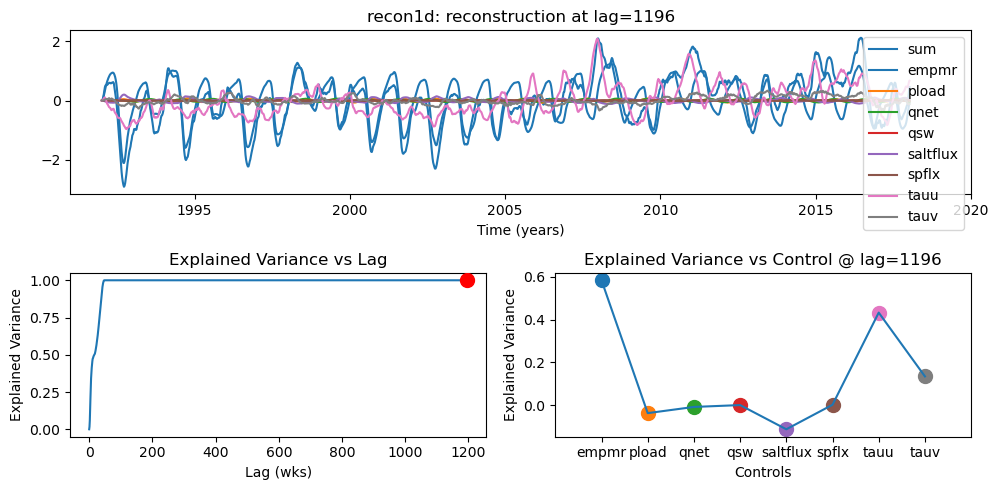

Enter lag to plot ... (0-1196 or -1 to exit)?  50


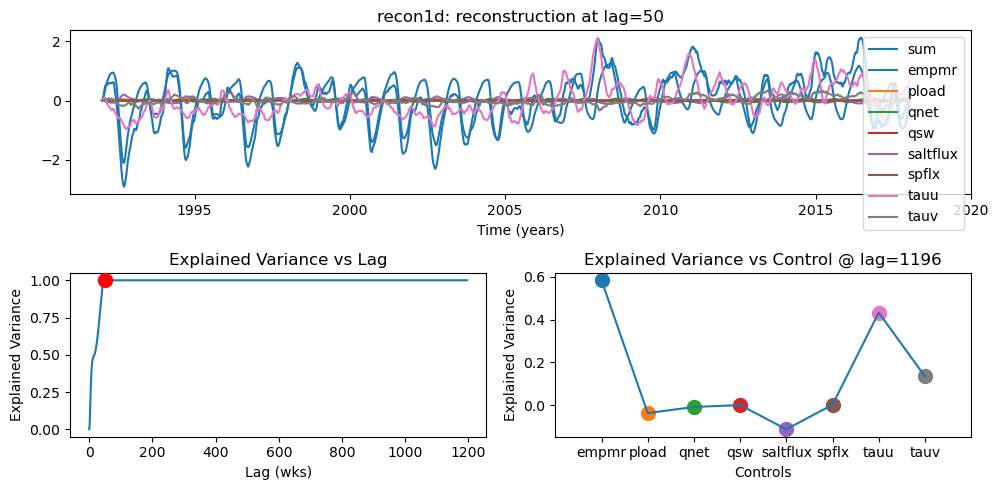

Enter lag to plot ... (0-1196 or -1 to exit)?  -1


Read recon2d to compute explained variance vs space ... (y/n)?  y


Reading recon2d_*.data and computing explained variance vs space (ev_space) ...

Variable recon2d is the adjoint gradient reconstruction (time-series)
as a function of space by a particular control using the maximum lag
chosen in the convolution. Here, recon2d is read to compute the explained
variance vs space (ev_space), but recon2d is not retained by this plotting
routine to minimize memory usage.

*********************************************
Detected ev_space file. Reading explained variance (EV)
as a function of space and control with respect to
the variance of full reconstruction up to maximum lag.
   ev_space: EV per unit area
from file
/efs_ecco/mzahn/emu_conv/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_1196/output/plot_conv_recon2d.ev_space


Plot explained variance vs space (ev_space) ...

Choose control to plot ... 
1) empmr
2) pload
3) qnet
4) qsw
5) saltflux
6) spflx
7) tauu
8) tauv



Enter control to plot explained variance (EV) vs space ...  (1-8)?  1


Control chosen: empmr


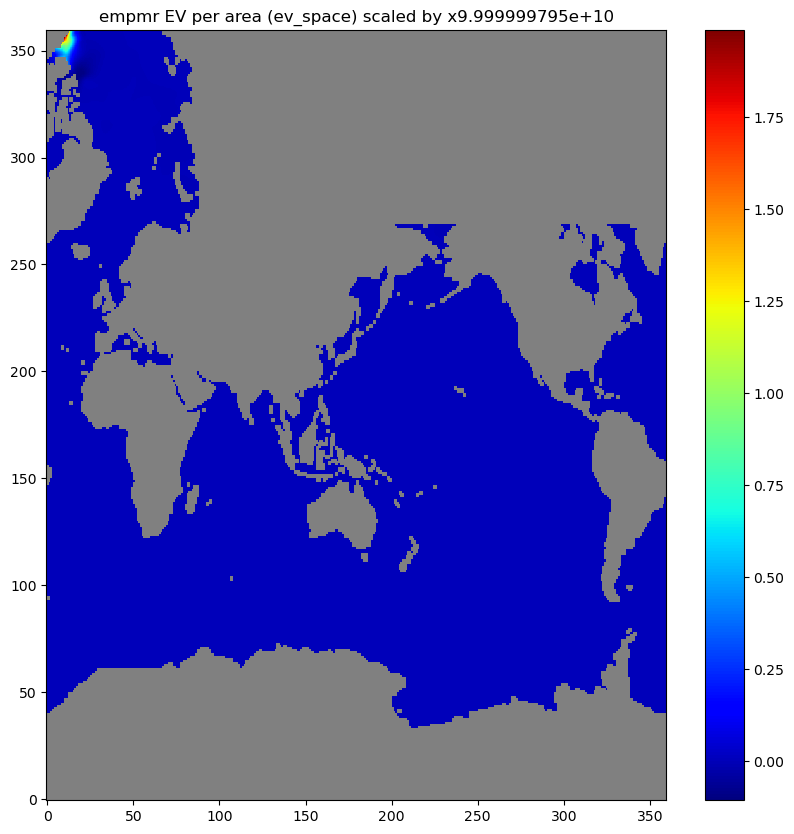

Enter control to plot explained variance (EV) vs space ...  (1-8)?  7


Control chosen: tauu


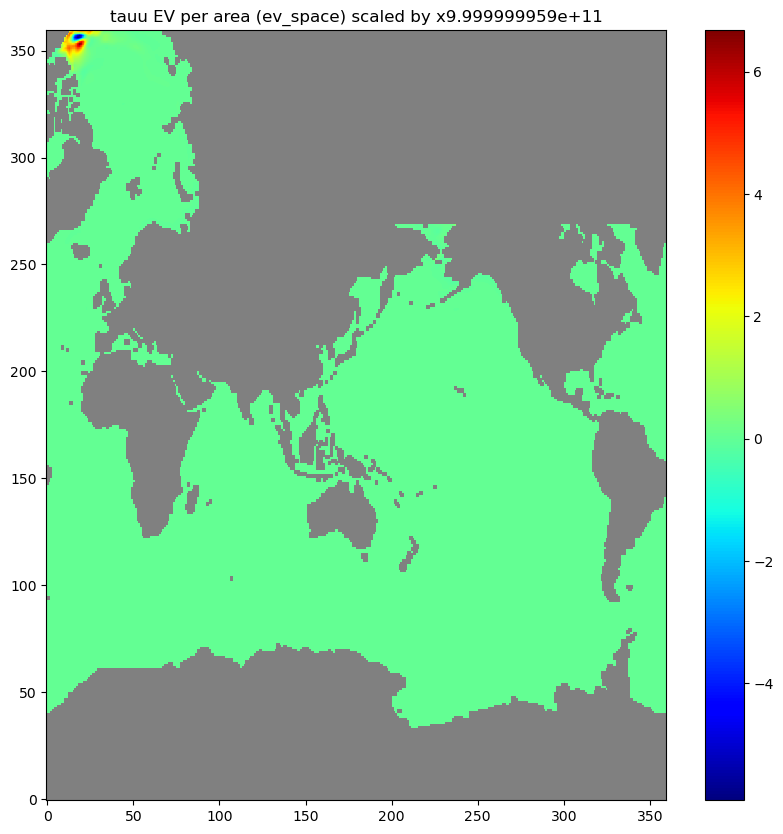

Enter control to plot explained variance (EV) vs space ...  (1-8)?  -1



***********************
EMU variables read as global variables in module global_emu_var (emu); e.g., emu.nx
***********************
cs                  drc                 drf                 dvol3d              
dxc                 dxg                 dyc                 dyg                 
ev_ctrl             ev_lag              ev_space            hfacc               
hfacs               hfacw               istep               nr                  
nx                  ny                  rac                 ras                 
raw                 raz                 rc                  recon1d             
rf                  smp                 smp_hr              smp_mn              
sn                  xc                  xg                  yc                  
yg                  


In [11]:
import runpy
runpy.run_path('/efs_ecco/ECCO/EMU/emu_userinterface_dir/python/emu_plot.py');
# The following that uses a module go through the same menu-driven process s using runpy above, but 
# globals_dict is a dictionary, containing 'return_vars' and 'emu'.
# return_vars' contains the data used to make the plot.
# emu contains more variables that were used in ept.
# globals_dict = ept.emu_plot()

In [12]:
# pull out dictionary of the convolution output
globals_dict_conv = ept.emu_plot(run_name="/efs_ecco/mzahn/emu_conv/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_1196/",
                            expvar_space='y');

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs_ecco/ECCO/EMU2/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/mzahn/emu_conv/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_1196/

Reading /efs_ecco/mzahn/emu_conv/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_1196

Reading Convolution Tool output ... 
<_io.BufferedReader name='/efs_ecco/mzahn/emu_conv/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_1196/output/recon1d_empmr.data'>
<_io.BufferedReader name='/efs_ecco/mzahn/emu_conv/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_1196/output/recon1d_pload.data'>
<_io.BufferedReader name='/efs_ecco/mzahn/emu_conv/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_1196/output/recon1d_qnet.data'>
<_io.BufferedReader name='/efs_ecco/mzahn/emu_conv/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_1196/output/recon1d_qsw.data'>
<_io.BufferedRe

In [17]:
# see what is inside dictionary
print(globals_dict_conv.keys())
print(globals_dict_conv['return_vars'].keys())

dict_keys(['return_vars', 'emu'])
dict_keys(['time_values', 'time_values_min', 'time_values_max', 'recon1d_sum_all_ctrl_vs_lag_time', 'recon1d_vs_lag_time', 'lag_in_weeks', 'expvar_vs_lag', 'ctrl_idx', 'expvar_vs_ctrl', 'num_lag_in_weeks', 'num_ctrl', 'ctrl_name', 'ctrl_idx_min', 'ctrl_idx_max', 'expvar_vs_space'])


In [22]:
# Extract return dictionary
return_vars_dict = globals_dict_conv.get('return_vars')

In [91]:
# Extract data for the plot
lag_in_weeks = return_vars_dict['lag_in_weeks'] 
time_values = return_vars_dict['time_values'] 
ctrl_name = return_vars_dict['ctrl_name']
recon1d_sum_all_ctrl_vs_lag_time = return_vars_dict['recon1d_sum_all_ctrl_vs_lag_time']
recon1d_vs_lag_time = return_vars_dict['recon1d_vs_lag_time']
expvar_vs_lag = return_vars_dict['expvar_vs_lag']
expvar_vs_ctrl = return_vars_dict['expvar_vs_ctrl']
ctrl_name = return_vars_dict['ctrl_name']
expvar_vs_space = return_vars_dict['expvar_vs_space']

## empmr explained variance in space

In [116]:
empmr_expvar_vs_space_faces = ecco.llc_compact_to_faces(expvar_vs_space[0,:,:])
empmr_expvar_vs_space_tiles = ecco.llc_faces_to_tiles(empmr_expvar_vs_space_faces)
empmr_expvar_vs_space_da = ecco.llc_tiles_to_xda(empmr_expvar_vs_space_tiles, var_type='c', dim4='time')

llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4


In [117]:
# open grid file
ecco_grid = xr.open_dataset('/efs_ecco/ECCO/V4/r5/grid/nctiles_grid/ECCO-GRID.nc')

In [118]:
land = ecco_grid.hFacC.isel(k=0).where(ecco_grid.hFacC.isel(k=0)!=True)

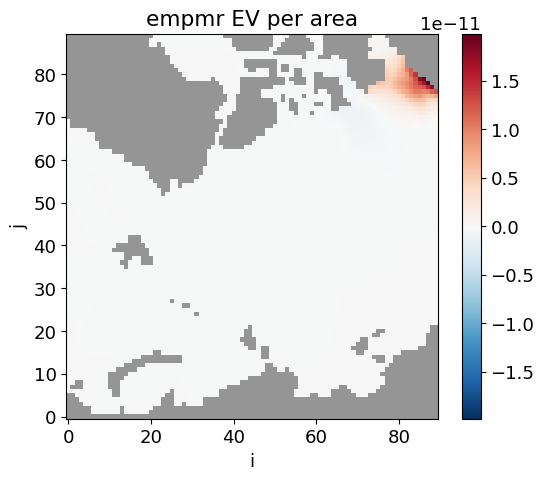

In [119]:
fig, ax = plt.subplots(1,1,figsize=[6,5])
empmr_expvar_vs_space_da.isel(tile=6).plot(ax=ax);
land.isel(tile=6).plot(ax=ax,cmap='Grays',add_colorbar=False);
ax.set_title('empmr EV per area');

In [120]:
tauu_expvar_vs_space_faces = ecco.llc_compact_to_faces(expvar_vs_space[-2,:,:])
tauu_expvar_vs_space_tiles = ecco.llc_faces_to_tiles(tauu_expvar_vs_space_faces)
tauu_expvar_vs_space_da = ecco.llc_tiles_to_xda(tauu_expvar_vs_space_tiles, var_type='c', dim4='time')

llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4


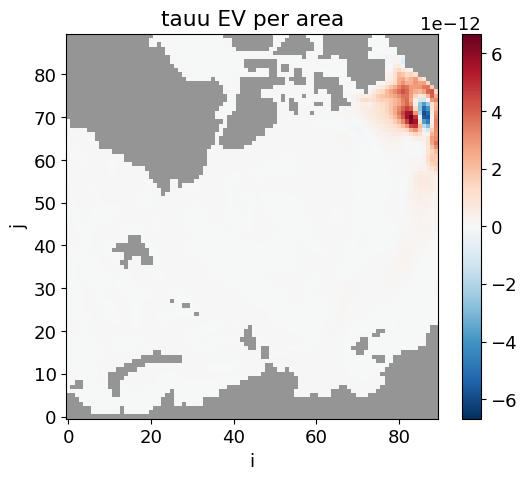

In [122]:
fig, ax = plt.subplots(1,1,figsize=[6,5])
tauu_expvar_vs_space_da.isel(tile=6).plot(ax=ax);
land.isel(tile=6).plot(ax=ax,cmap='Grays',add_colorbar=False);
ax.set_title('tauu EV per area');

## Explained variance vs lag

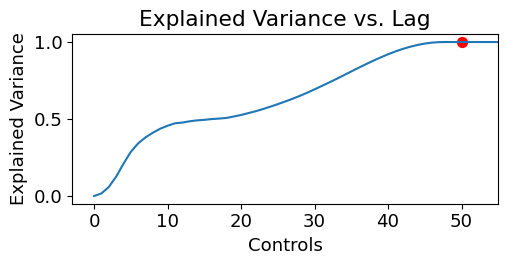

In [65]:
fig,ax = plt.subplots(1,1,figsize=[5.5,2.2])
ax.plot(lag_in_weeks, expvar_vs_lag);
ax.scatter(50,1,color='r',s=50)
ax.set_xlim(-3,55)
ax.set_title('Explained Variance vs. Lag')
ax.set_ylabel('Explained Variance')
ax.set_xlabel('Controls');

## Explained variance vs lag

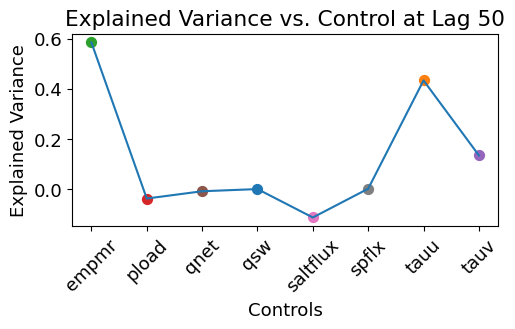

In [60]:
fig,ax = plt.subplots(1,1,figsize=[5.5,2.5])
ax.plot(ctrl_name, expvar_vs_ctrl);

# add dots
ax.scatter(ctrl_name[0],expvar_vs_ctrl[0],color='tab:green',s=50)
ax.scatter(ctrl_name[1],expvar_vs_ctrl[1],color='tab:red',s=50)
ax.scatter(ctrl_name[2],expvar_vs_ctrl[2],color='tab:brown',s=50)
ax.scatter(ctrl_name[3],expvar_vs_ctrl[3],color='tab:blue',s=50)
ax.scatter(ctrl_name[4],expvar_vs_ctrl[4],color='tab:pink',s=50)
ax.scatter(ctrl_name[5],expvar_vs_ctrl[5],color='tab:gray',s=50)
ax.scatter(ctrl_name[6],expvar_vs_ctrl[6],color='tab:orange',s=50)
ax.scatter(ctrl_name[7],expvar_vs_ctrl[7],color='tab:purple',s=50)

# rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45)

ax.set_title('Explained Variance vs. Control at Lag 50')
ax.set_ylabel('Explained Variance')
ax.set_xlabel('Controls');

## Convolution reconstruction at lag 50

In [45]:
print(globals_dict_conv['return_vars']['ctrl_name'])

['empmr', 'pload', 'qnet', 'qsw', 'saltflux', 'spflx', 'tauu', 'tauv']


In [46]:
recon1d_vs_lag_time.shape

(8, 1197, 1357)

In [47]:
# pull out wind stress components
tauu = recon1d_vs_lag_time[-2,:,:][-1] # -1 is pulling out last lag
tauv = recon1d_vs_lag_time[-1,:,:][-1]

recon_wind = tauu + tauv

# pull out empmr
empmr = recon1d_vs_lag_time[0,:,:][-1]

Create plot that shows $\Delta$ SSS from the ECCOv4r4 output (from sampling tool), the convolution of all the control variables, and the convolution of wind stress, and convolution of empmr

<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_53/536397781.py:16: SyntaxWarning: invalid escape sequence '\D'
  ax.set_ylabel("$\Delta$ SSS")


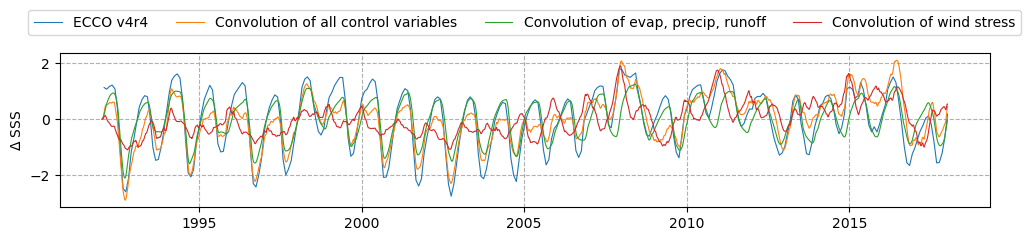

In [48]:
fig, ax = plt.subplots(1,1,figsize=[12,2])
lw = 0.8

ax.plot(samp_time_box,\
         delta_sss_box,label='ECCO v4r4',linewidth=lw);

plt.plot(time_values,\
         recon1d_sum_all_ctrl_vs_lag_time[-1],label='Convolution of all control variables',linewidth=lw);

ax.plot(time_values,\
         empmr,label='Convolution of evap, precip, runoff',linewidth=lw);

ax.plot(time_values,\
         recon_wind,label='Convolution of wind stress',linewidth=lw);

ax.set_ylabel("$\Delta$ SSS")
# plt.ylim(-0.15,0.15)
ax.set_xlabel("")
ax.grid(linewidth=lw,linestyle='dashed')
ax.legend(ncol=4,bbox_to_anchor=[0.5,1.2],loc='center');

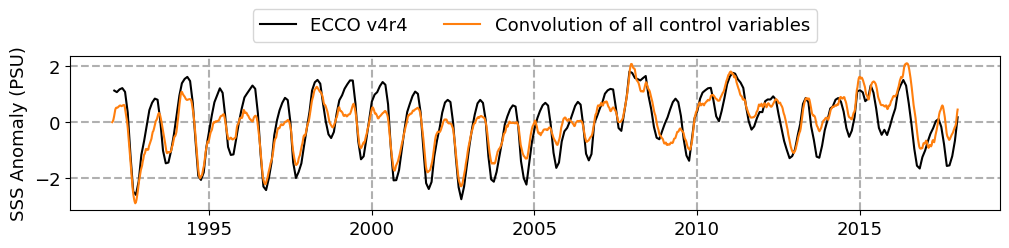

In [124]:
plt.rcParams['font.size'] = 13
fig, ax = plt.subplots(1,1,figsize=[12,2])
lw = 1.5

ax.plot(samp_time_box,\
         delta_sss_box,label='ECCO v4r4',linewidth=lw,color='k');

plt.plot(time_values,\
         recon1d_sum_all_ctrl_vs_lag_time[-1],label='Convolution of all control variables',linewidth=lw,color='tab:orange');

# ax.plot(time_values,\
#          empmr,label='Convolution of evap, precip, runoff',linewidth=lw);

# ax.plot(time_values,\
#          recon_wind,label='Convolution of wind stress',linewidth=lw);

ax.set_ylabel("SSS Anomaly (PSU)")
# plt.ylim(-0.15,0.15)
ax.set_xlabel("")
ax.grid(linewidth=lw,linestyle='dashed')
ax.legend(ncol=3,bbox_to_anchor=[0.5,1.2],loc='center');

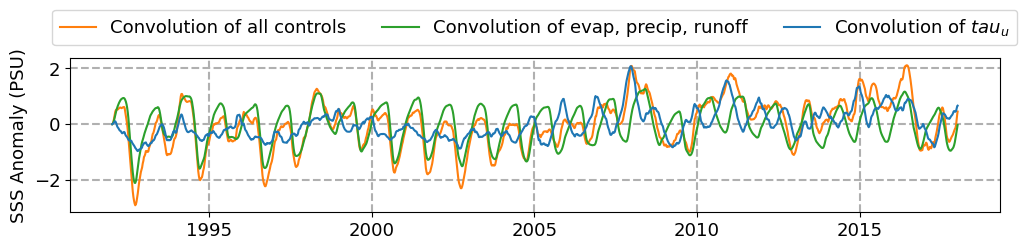

In [55]:
fig, ax = plt.subplots(1,1,figsize=[12,2])
lw = 1.5

# ax.plot(samp_time_box,\
#          delta_sss_box,label='ECCO v4r4',linewidth=lw);

plt.plot(time_values,recon1d_sum_all_ctrl_vs_lag_time[-1],label='Convolution of all controls',linewidth=lw,color='tab:orange');

ax.plot(time_values,empmr,label='Convolution of evap, precip, runoff',linewidth=lw,color='tab:green');

ax.plot(time_values,tauu,label='Convolution of $tau_u$',linewidth=lw,color='tab:blue');

ax.set_ylabel("SSS Anomaly (PSU)")
# plt.ylim(-0.15,0.15)
ax.set_xlabel("")
ax.grid(linewidth=lw,linestyle='dashed')
ax.legend(ncol=3,bbox_to_anchor=[0.5,1.2],loc='center');